In [ ]:
# df[“column”].astype(Type)
# df.dtypes
# df.rename(columns={“old name”:“new name”,”old name2”:”new name2”})
# df[‘new variable’] = df[‘one feature’] / df[‘another feature’]

# ### Research Question To what extent does BMI affect insurance charges, and does this relationship vary by sex or smoking status?

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
url = "https://raw.githubusercontent.com/the-codingschool/datasets/refs/heads/main/insurance.csv"
df_insurance = pd.read_csv(url)


In [ ]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_insurance.dtypes


,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:

df_insurance['sex'].value_counts()


,count
sex,
male,676
female,662


In [ ]:
df_insurance['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:

df_insurance['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
df_insurance.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


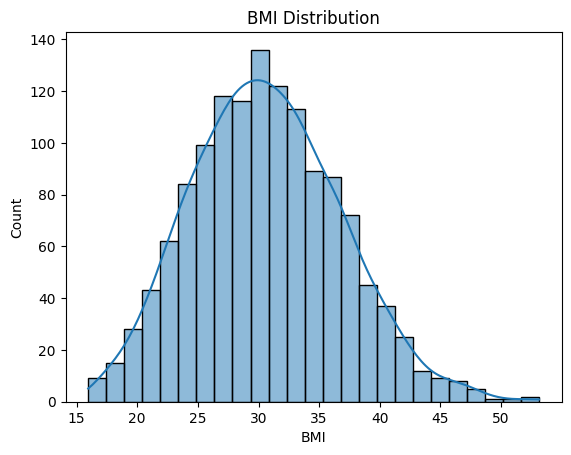

In [ ]:
sns.histplot(df_insurance['bmi'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

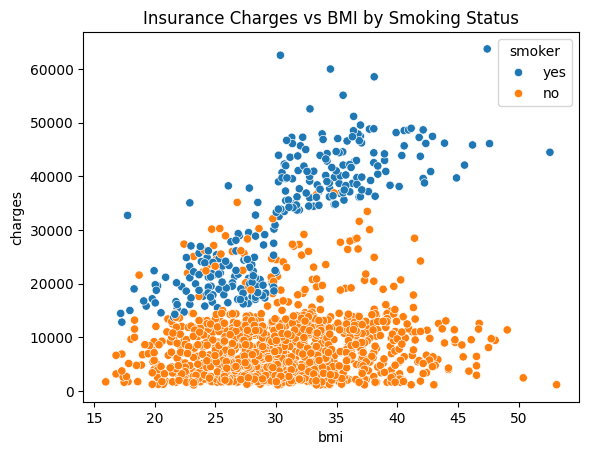

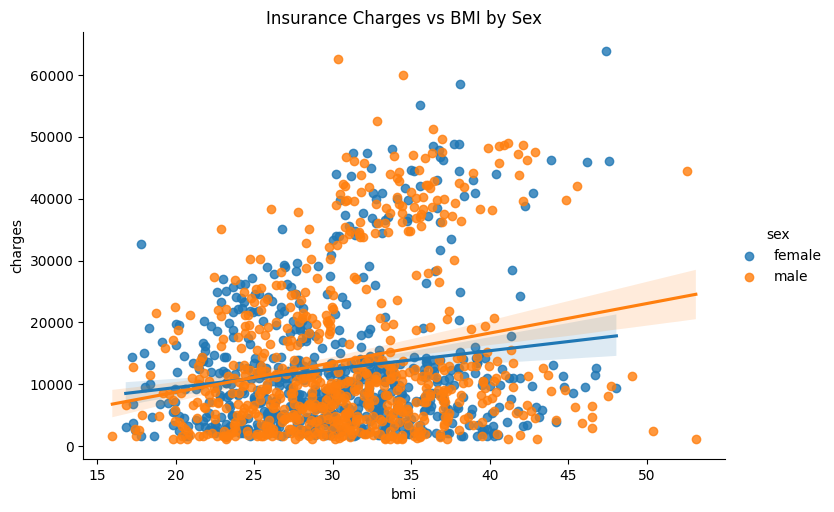

In [ ]:
# Charges by BMI and smoker status
# Smoker line is much higher Smokers pay significantly more at any BMI
# Smoker line is steeper. Charges rise faster as BMI increases for smokers.
# Yes the relationship between BMI and charges varies by smoking status. There’s likely a statistically significant interaction between bmi and smoker.

sns.scatterplot(data=df_insurance, x='bmi', y='charges', hue='smoker')
plt.title('Insurance Charges vs BMI by Smoking Status')
plt.show()



# Charges by BMI and sex
#Lines are close together	BMI affects males and females similarly
#since male line is higher Men might be charged slightly more overall (after controlling for BMI)

sns.lmplot(data=df_insurance, x='bmi', y='charges', hue='sex', aspect=1.5)
plt.title('Insurance Charges vs BMI by Sex')
plt.show()


In [ ]:
df_insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


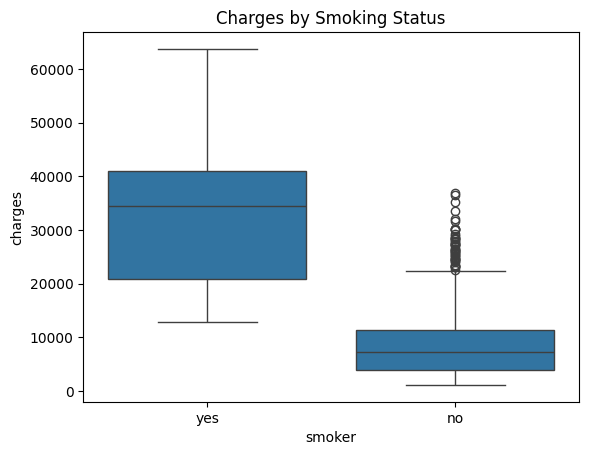

In [ ]:
# Boxplot of charges by smoker
sns.boxplot(x='smoker', y='charges', data=df_insurance)
plt.title('Charges by Smoking Status')
plt.show()

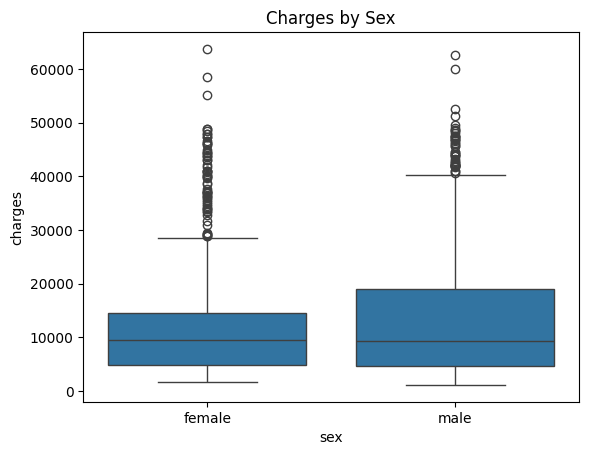

In [ ]:
# Boxplot of charges by sex
sns.boxplot(x='sex', y='charges', data=df_insurance)
plt.title('Charges by Sex')
plt.show()

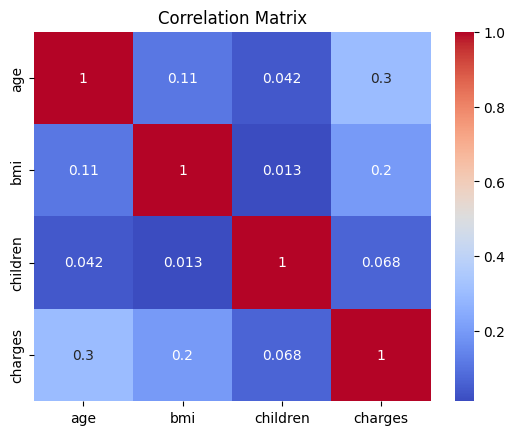

In [ ]:
## # Correlation heatmap (for numeric variables)
sns.heatmap(df_insurance.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import statsmodels.formula.api as smf

# Baseline model: just main effects
baseline_model = smf.ols('charges ~ bmi + smoker + sex', data=df_insurance).fit()

# Summary of baseline model
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     855.8
Date:                Tue, 15 Jul 2025   Prob (F-statistic):          3.18e-310
Time:                        18:55:38   Log-Likelihood:                -13760.
No. Observations:                1338   AIC:                         2.753e+04
Df Residuals:                    1334   BIC:                         2.755e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3353.5281   1008.785     -3.324

In [ ]:
# quick regression

import statsmodels.formula.api as smf

model = smf.ols('charges ~ bmi * smoker + bmi * sex + age + children + region', data=df_insurance).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     701.5
Date:                Mon, 14 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:15:17   Log-Likelihood:                -13248.
No. Observations:                1338   AIC:                         2.652e+04
Df Residuals:                    1327   BIC:                         2.657e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2353.4532   1102.796     -2.134      0.033   -4516.867    -190.040
smoker[T.yes]       -2.042e+04   1648.875    -12.382      0.000   -2.37e+04   -1.72e+04
sex[T.male]          -245.3761   1364.603     -0.180      0.857   -2922.390    2431.638
region[T.northwest]  -584.9906    381.006     -1.535      0.125   -1332.431     162.450
region[T.southeast] -1206.5990    383.338     -3.148      0.002   -1958.614    -454.584
region[T.southwest] -1228.1887    382.664     -3.210      0.001   -1978.881    -477.496
bmi                    27.7057     33.710      0.822      0.411     -38.424      93.836
bmi:smoker[T.yes]    1443.2045     52.669     27.401      0.000    1339.881    1546.528
bmi:sex[T.male]        -8.3180     43.695     -0.190      0.849     -94.036      77.400
age                   263.6493      9.521     27.693      0.000     244.972     282.326
children              516.1858    110.225      4.683      0.000     299.951     732.421
==============================================================================
Omnibus:                      721.464   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4462.771
Skew:                           2.528   Prob(JB):                         0.00
Kurtosis:                      10.381   Cond. No.                         715.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
 # df_insurance.rename(columns={
    #'age': 'age',
    #'sex': 'sex',
    #'bmi': 'bmi',
    #'children': 'children',
    #'smoker': 'smoker',
    #'region': 'region',
    #'charges': 'Insurance_Cost'
#}, #inplace=True)

In [ ]:
 # df_insurance.head()

,Age,Sex,BMI,Children,Smoker,Region,Insurance_Cost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df_reduced = df_insurance.drop(columns=['age', 'children', 'region'])

In [ ]:
df_reduced.to_csv('insurance_reduced.csv', index=False)

In [ ]:
df_check = pd.read_csv('insurance_reduced.csv')
df_check.head()

,sex,bmi,smoker,charges
0,female,27.900,yes,16884.92400
1,male,33.770,no,1725.55230
2,male,33.000,no,4449.46200
3,male,22.705,no,21984.47061
4,male,28.880,no,3866.85520


In [ ]:
file_path = "/content/drive/My Drive/insurance_reduced.csv"

In [ ]:
df_reduced.to_csv(file_path, index=False)

In [ ]:
# baseline moidel in SKlearn WEEK 3

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

# Encode categorical features
X = pd.get_dummies(df_insurance[['bmi', 'age', 'children', 'sex', 'smoker', 'region']], drop_first=True)
y = df_insurance['charges']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import and fit model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predict
y_pred = lin_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression R²: {r2:.3f}")
print(f"Linear Regression RMSE: {rmse:.2f}")

Linear Regression R²: 0.784
Linear Regression RMSE: 5796.28


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest R²: {r2_rf:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")

Random Forest R²: 0.865
Random Forest RMSE: 4578.30


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Lasso Regression R²: {r2_lasso:.3f}")
print(f"Lasso Regression RMSE: {rmse_lasso:.2f}")

Lasso Regression R²: 0.784
Lasso Regression RMSE: 5796.29


In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Ridge Regression R²: {r2_ridge:.3f}")
print(f"Ridge Regression RMSE: {rmse_ridge:.2f}")

Ridge Regression R²: 0.783
Ridge Regression RMSE: 5800.43
